In [ ]:
# data link:   https://www.kaggle.com/uciml/breast-cancer-wisconsin-data




# In this data set we can see that there are ten real-valued features that are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)





In [99]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
from sklearn.metrics import silhouette_score


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df=pd.read_csv('/content/drive/MyDrive/data/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
df.shape

(569, 33)

In [40]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


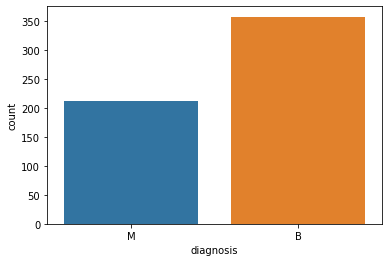

In [43]:
sns.countplot(df['diagnosis'])

In [44]:
# checking missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [45]:
# the columns id (patient id numbers) and unnamed 32 appear to be unhelpful in terms in data insights, so I will drop them
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [46]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

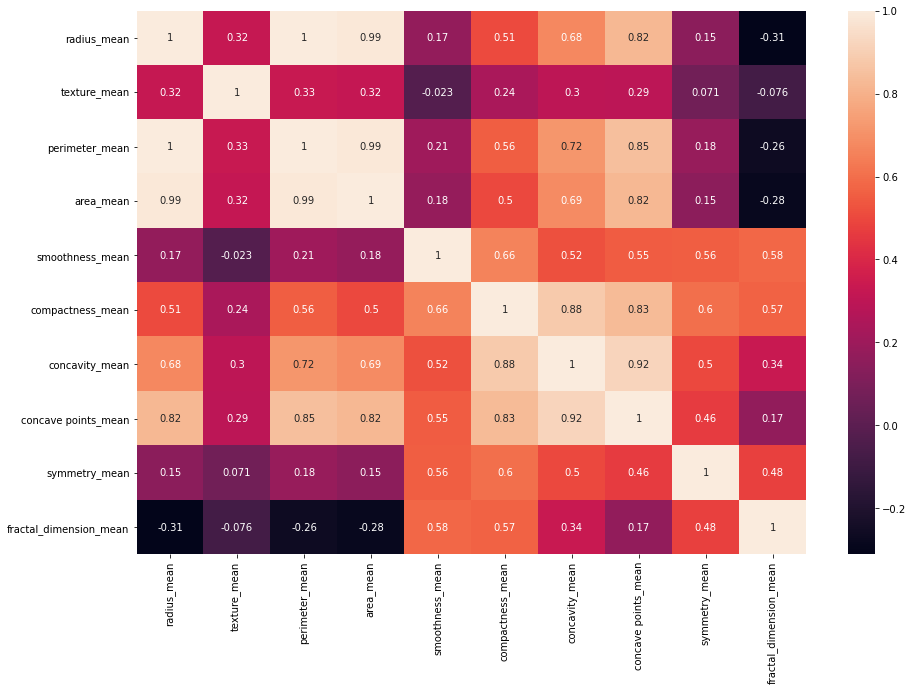

In [47]:
features_mean=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,10))
sns.heatmap(df[features_mean].corr(),annot=True)

In [48]:
y=df['diagnosis']
x=df.drop(columns=['diagnosis'])
from sklearn import preprocessing

X = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns=x.columns
df_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [49]:
# since the number of features are too many we show them in 10 
data1=df_scaled
data1=pd.concat([y,data1.iloc[:,0:10]],axis=1)
data1


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816
...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442


In [50]:
df_part1=pd.melt(data1,id_vars="diagnosis",var_name="features",value_name='value')
df_part1


,diagnosis,features,value
0,M,radius_mean,0.521037
1,M,radius_mean,0.643144
2,M,radius_mean,0.601496
3,M,radius_mean,0.210090
4,M,radius_mean,0.629893
...,...,...,...
5685,M,fractal_dimension_mean,0.132056
5686,M,fractal_dimension_mean,0.113100
5687,M,fractal_dimension_mean,0.137321
5688,M,fractal_dimension_mean,0.425442


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

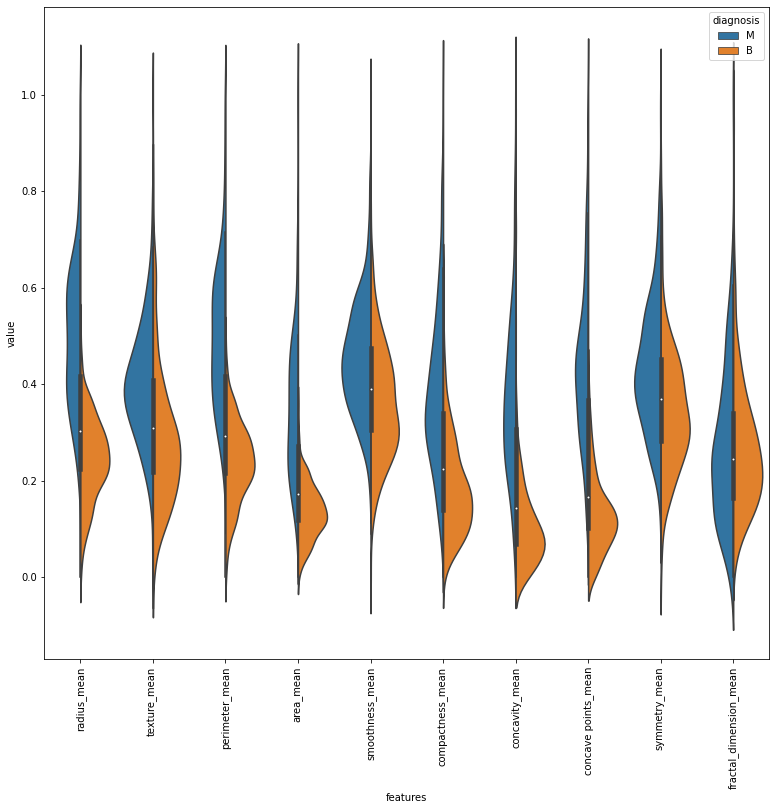

In [51]:

plt.figure(figsize=(13,12))
sns.violinplot(x='features',y='value',hue='diagnosis',split=True,data=df_part1)
plt.xticks(rotation=90)

Second Ten Features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

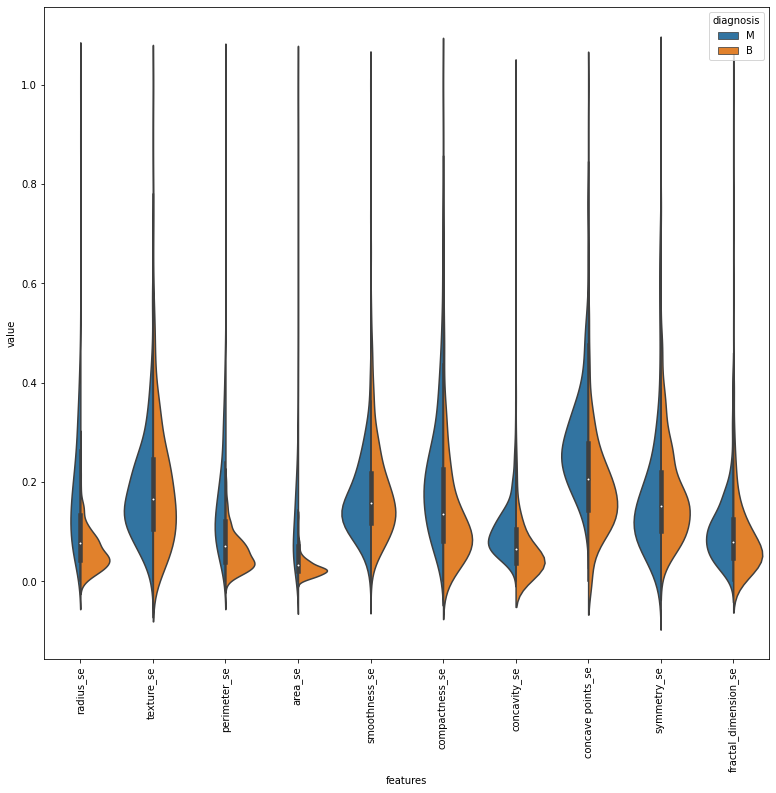

In [52]:
data2=df_scaled
data2=pd.concat([y,data2.iloc[:,10:20]],axis=1)
df_part2=pd.melt(data2,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(13,12))
sns.violinplot(x='features',y='value',hue='diagnosis',split=True,data=df_part2)
plt.xticks(rotation=90)

third Ten Features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

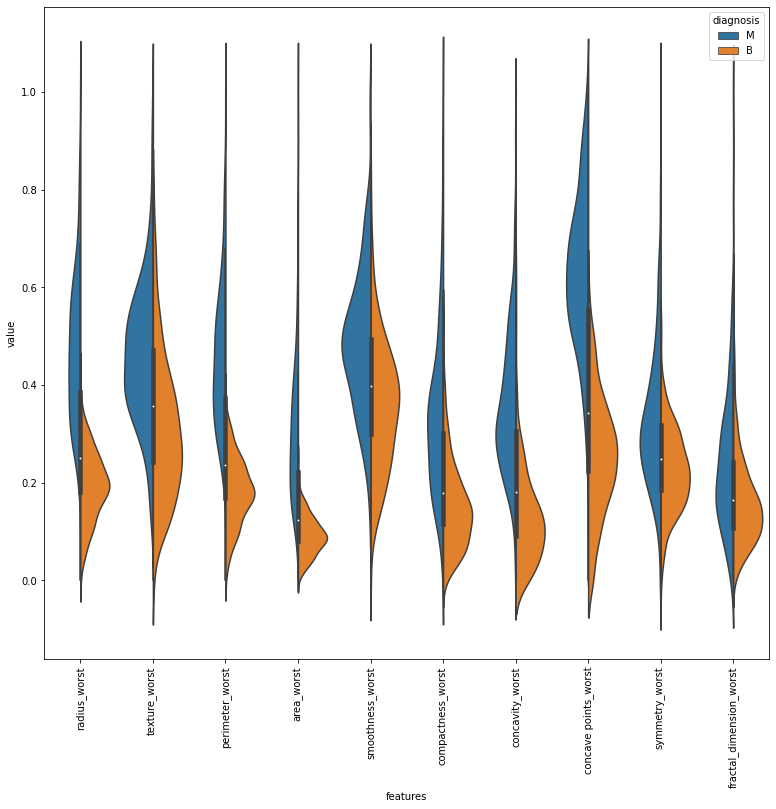

In [53]:
data3=df_scaled
data3=pd.concat([y,data3.iloc[:,20:31]],axis=1)
df_part3=pd.melt(data3,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(13,12))
sns.violinplot(x='features',y='value',hue='diagnosis',split=True,data=df_part3)
plt.xticks(rotation=90)


# unsupervised Learning machine

# visualization 
## 1. PCA

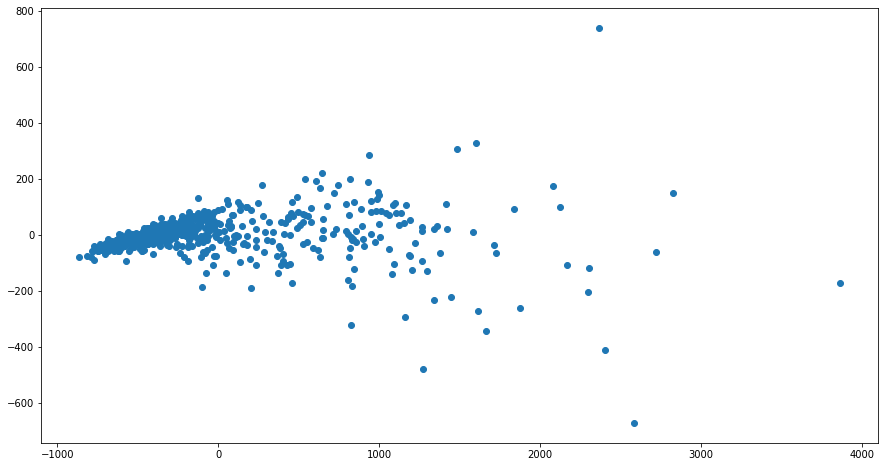

In [54]:
X=df.drop(columns=['diagnosis'],axis=1)
y=df['diagnosis']
# pca plot 
pca=PCA(n_components=2)
pca_componenet=pca.fit_transform(X)
plt.figure(figsize=(15,8))
plt.scatter(pca_componenet[:,0],pca_componenet[:,1])

the pca plot doesnt show any meannnigful clustering in the data  ,lets try UMAP







## 2. umap



In [57]:
import umap.umap_ as umap
umap_result = umap.UMAP(n_neighbors=5,
                  min_dist=0.3,
                  random_state=42).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


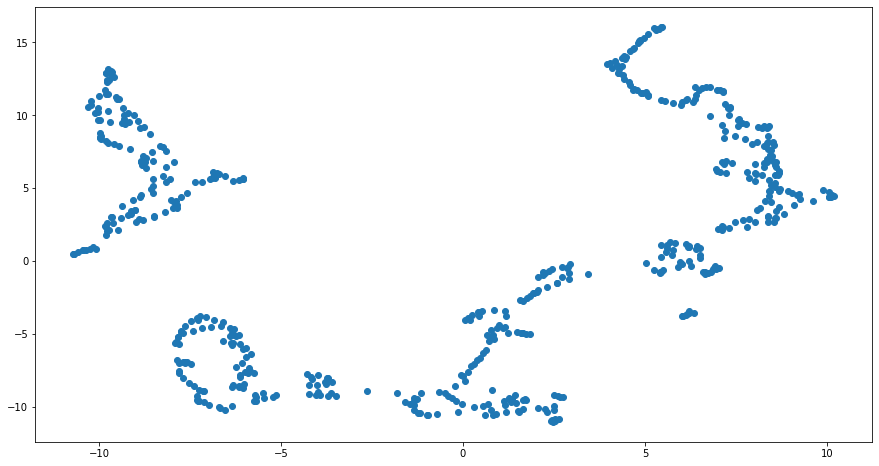

In [60]:
plt.figure(figsize=(15,8))
plt.scatter(umap_result[:,0],umap_result[:,1])

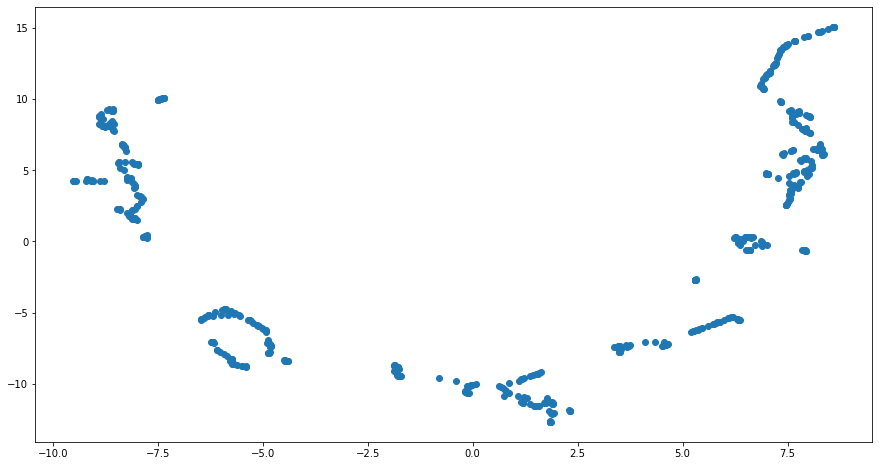

In [61]:
umap_result = umap.UMAP(n_neighbors=5,
                  min_dist=0.01,
                  random_state=42).fit_transform(X)
plt.figure(figsize=(15,8))
plt.scatter(umap_result[:,0],umap_result[:,1])

In [65]:
# Scaling data
from sklearn.preprocessing import  StandardScaler
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

## 1. kmean
# elbow mehod to find the best number of cluster

In [72]:
from sklearn.cluster import  KMeans
wss=[]
for k in range(1,12):
  kmean=KMeans( n_clusters=k)
  kmeans=kmean.fit(X_scaled)
  wss_iter=kmeans.inertia_
  wss.append(wss_iter)
wss_score=pd.DataFrame({'number of clusters':range(1,12),'wss':wss})
wss_score

,number of clusters,wss
0,1,17070.000000
1,2,11595.526607
2,3,10061.797818
3,4,9264.404515
4,5,8553.480256
5,6,7981.680108
6,7,7538.751514
7,8,7211.110529
8,9,6909.064784
9,10,6655.129666


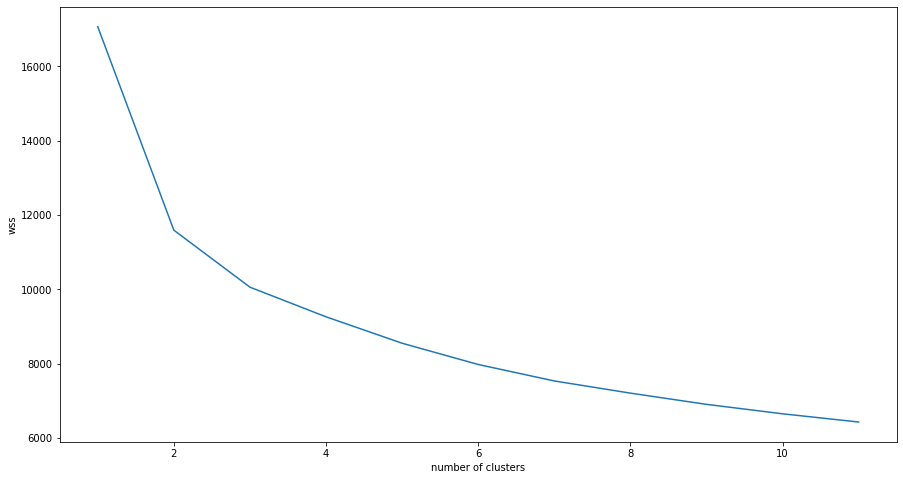

In [83]:
plt.figure(figsize=(15,8))

sns.lineplot (data=wss_score,x='number of clusters',y='wss',markers=True)

the silhouette_score=0.314384


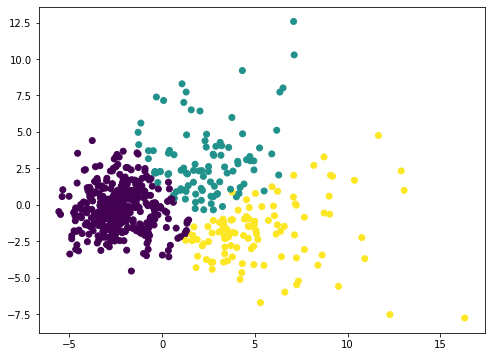

In [110]:
# lets try for k=3 cluster
n_clusters=3
kmean=KMeans(n_clusters)
x_pca=PCA(n_components=2).fit_transform(X_scaled)
predict_3=kmean.fit_predict(X_scaled)
print('the silhouette_score={:2f}'.format(silhouette_score(X_scaled,predict_3)))
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=predict_3)

the silhouette_score=0.272344


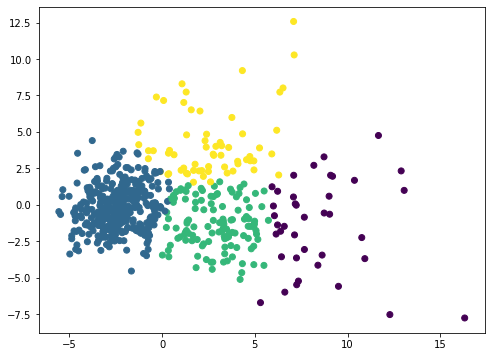

In [112]:
# lets try for k=4 cluster
kmean=KMeans(n_clusters=4)
x_pca=PCA(n_components=2).fit_transform(X_scaled)
predict_4=kmean.fit_predict(X_scaled)
print('the silhouette_score={:2f}'.format(silhouette_score(X_scaled,predict_4)))

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=predict_4)

the silhouette_score=0.160674


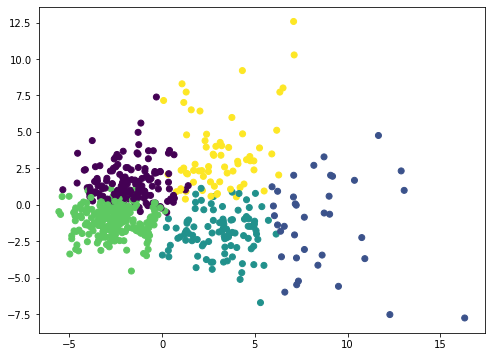

In [113]:
# lets try for k=5 cluster
kmean=KMeans(n_clusters=5)
x_pca=PCA(n_components=2).fit_transform(X_scaled)
predict_5=kmean.fit_predict(X_scaled)
print('the silhouette_score={:2f}'.format(silhouette_score(X_scaled,predict_5)))

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=predict_5)

## 2.Density-based Spatial Clustering of Applications with Noise (DBSCAN)**


In [114]:
from sklearn.cluster import DBSCAN

In [122]:
dbscan=DBSCAN(eps=1.5,min_samples=5)
predict_dbscan=dbscan.fit_predict(X_scaled)
print(silhouette_score(X_scaled,predict_dbscan))


-0.2195882795673518


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


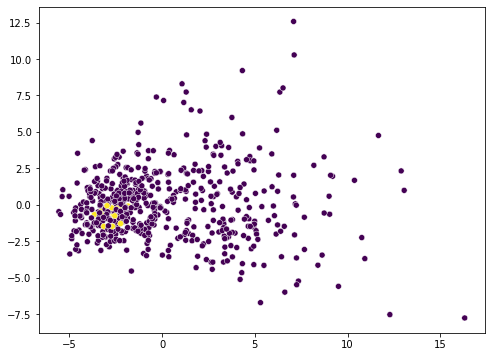

In [124]:
plt.figure(figsize=(8,6))

sns.scatterplot(x_pca[:,0],x_pca[:,1],c=predict_dbscan)

-0.19851389887763776


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


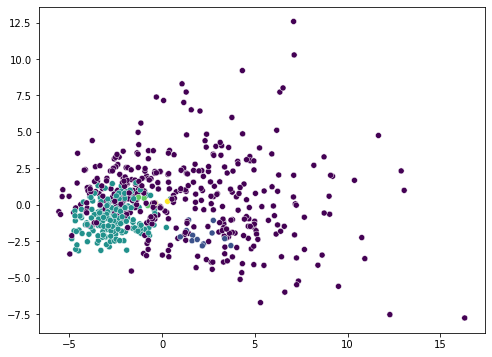

In [127]:
dbscan=DBSCAN(eps=2,min_samples=5)
predict_dbscan=dbscan.fit_predict(X_scaled)
print(silhouette_score(X_scaled,predict_dbscan))
plt.figure(figsize=(8,6))

sns.scatterplot(x_pca[:,0],x_pca[:,1],c=predict_dbscan)